# Concise Implementation of Softmax Regression
:label:`sec_softmax_concise`



Just as high-level deep learning frameworks
made it easier to implement linear regression
(see :numref:`sec_linear_concise`),
they are similarly convenient here.


In [3]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## Defining the Model

As in :numref:`sec_linear_concise`, 
we construct our fully connected layer 
using the built-in layer. 
The built-in `__call__` method then invokes `forward` 
whenever we need to apply the network to some input.


We use a `Flatten` layer to convert the fourth-order tensor `X` to second order 
by keeping the dimensionality along the first axis unchanged.


# ⌚ Before this...
We had the manual classes like...

<img src="../images/module.png">


<img src="../images/Classifier-Class.png">


<img src="../images/Softax-Classification-Scratch.png">

In [49]:
class SoftmaxRegression(d2l.Classifier):  #@save
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X) # just this!?

> # 🔥
> The `nn.Flatten()` basically **flattens anything that comes**. So, there we will pass the 28x28 imnage, we will flatten it into `784` automatically. That is just the transformation -- and *not* the layer itself.

In [47]:
@d2l.add_to_class(d2l.Classifier)  #@save
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(
        Y_hat, Y, reduction='mean' if averaged else 'none')

## Training

Next we train our model. We use Fashion-MNIST images, flattened to 784-dimensional feature vectors.


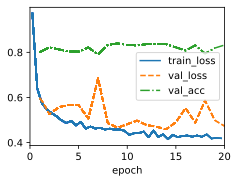

In [50]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.2)
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, data)

## Good... let's inspect the beneath

In [8]:
steps = nn.Sequential(nn.Flatten(), nn.LazyLinear(10))

In [9]:
steps

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): LazyLinear(in_features=0, out_features=10, bias=True)
)

In [28]:
flatten = steps[0]
flatten

Flatten(start_dim=1, end_dim=-1)

In [33]:
X, y = next(iter(data.train_dataloader()))

In [39]:
# before
X.shape

torch.Size([256, 1, 28, 28])

In [40]:
# after
flatten(X).shape

torch.Size([256, 784])

## The main things used here:


```python
# 1.
self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_outputs))

# 2.
F.cross_entropy(Y_hat, Y, reduction='mean' if averaged else 'none')
```



As before, this algorithm converges to a solution
that is reasonably accurate,
albeit this time with fewer lines of code than before.


## Summary

High-level APIs are very convenient at hiding from their user potentially dangerous aspects, such as numerical stability. Moreover, they allow users to design models concisely with very few lines of code. This is both a blessing and a curse. The obvious benefit is that it makes things highly accessible, even to engineers who never took a single class of statistics in their life (in fact, they are part of the target audience of the book). But hiding the sharp edges also comes with a price: a disincentive to add new and different components on your own, since there is little muscle memory for doing it. Moreover, it makes it more difficult to *fix* things whenever the protective padding of
a framework fails to cover all the corner cases entirely. Again, this is due to lack of familiarity.

As such, we strongly urge you to review *both* the bare bones and the elegant versions of many of the implementations that follow. While we emphasize ease of understanding, the implementations are nonetheless usually quite performant (convolutions are the big exception here). It is our intention to allow you to build on these when you invent something new that no framework can give you.


## Exercises

1. Deep learning uses many different number formats, including FP64 double precision (used extremely rarely),
FP32 single precision, BFLOAT16 (good for compressed representations), FP16 (very unstable), TF32 (a new format from NVIDIA), and INT8. Compute the smallest and largest argument of the exponential function for which the result does not lead to numerical underflow or overflow.
1. INT8 is a very limited format consisting of nonzero numbers from $1$ to $255$. How could you extend its dynamic range without using more bits? Do standard multiplication and addition still work?
1. Increase the number of epochs for training. Why might the validation accuracy decrease after a while? How could we fix this?
1. What happens as you increase the learning rate? Compare the loss curves for several learning rates. Which one works better? When?


[Discussions](https://discuss.d2l.ai/t/53)
